## UK Inflation (CPIH) Time Series Analysis and 12-Month Forecast (1989–2022)

This project explores historical and forecasted UK inflation using the Consumer Prices Index 
including owner occupiers’ housing costs (CPIH) from 1989 to 2022. 
The analysis examines long-term inflation trends, seasonal patterns, 
and produces a 12-month forecast using an ARIMA model, offering insights into the potential direction of inflation 
and its implications for the UK economy.

### Objectives:

1. To analyse long-term trends in UK inflation between 1989 and 2022.

2. To identify seasonal patterns or recurring fluctuations in price levels.

3. To build and interpret an ARIMA model for forecasting inflation for the next 12 months.

4. To understand the economic significance of inflation patterns for policymakers, households, and businesses.

5. To provide a foundation for further research into correlations between inflation and other socio-economic indicators.

### Why UK Inflation is Important:

Inflation is a vital measure of the cost of living and the purchasing power of money. 
In the UK, inflation directly affects interest rates, wages, and consumer confidence.

Understanding inflation is essential because:
1. It guides monetary policy decisions by the Bank of England.
2. It influences business planning, including pricing and wage strategies.
3. It impacts household finances, particularly savings and the affordability of goods and services.
4. It provides insight into the overall stability of the economy.

By examining inflation trends, policymakers and economists can better anticipate future economic challenges and design effective responses.

In [1]:
import pandas as pd
Inflation_Month=pd.read_excel("UK Inflation by Month dataset 1989-2022.xlsx")
Inflation_Month

,Year,Month,Inflation
0,1989,JAN,5.7
1,1989,FEB,5.8
2,1989,MAR,5.9
3,1989,APR,5.6
4,1989,MAY,5.9
...,...,...,...
410,2023,MAR,8.9
411,2023,APR,7.8
412,2023,MAY,7.9
413,2023,JUN,7.3


In [2]:
Inflation_Month.dtypes

Year           int64
Month         object
Inflation    float64
dtype: object

In [3]:
Inflation_Month["Month"]=pd.to_datetime(Inflation_Month["Month"], format="%b").dt.month
Inflation_Month

,Year,Month,Inflation
0,1989,1,5.7
1,1989,2,5.8
2,1989,3,5.9
3,1989,4,5.6
4,1989,5,5.9
...,...,...,...
410,2023,3,8.9
411,2023,4,7.8
412,2023,5,7.9
413,2023,6,7.3


In [4]:
Inflation_Month["Month"]=Inflation_Month["Month"].astype(int)

In [5]:
Inflation_Month.dtypes

Year           int64
Month          int64
Inflation    float64
dtype: object

#### Step 1: Prepare Time Series Data

Now that the dataset is cleaned and contains `Year`, `Month`, `Inflation`, and `Date`,  
we will set the **Date** column as the index. This allows us to treat the data as a time series and sort it chronologically.

In [6]:
#Combine "Year" and "Month" into a single datetime column
Inflation_Month["Date"]=pd.to_datetime(Inflation_Month["Year"].astype(str)+"-"+Inflation_Month["Month"].astype(str)+"-01",errors="coerce")

In [7]:
#Set "Date"as the index and sort
Inflation_Month=Inflation_Month.set_index("Date").sort_index()
Inflation_Month

,Year,Month,Inflation
Date,,,
1989-01-01,1989,1,5.7
1989-02-01,1989,2,5.8
1989-03-01,1989,3,5.9
1989-04-01,1989,4,5.6
1989-05-01,1989,5,5.9
...,...,...,...
2023-03-01,2023,3,8.9
2023-04-01,2023,4,7.8
2023-05-01,2023,5,7.9


<Axes: xlabel='Date', ylabel='Inflation'>

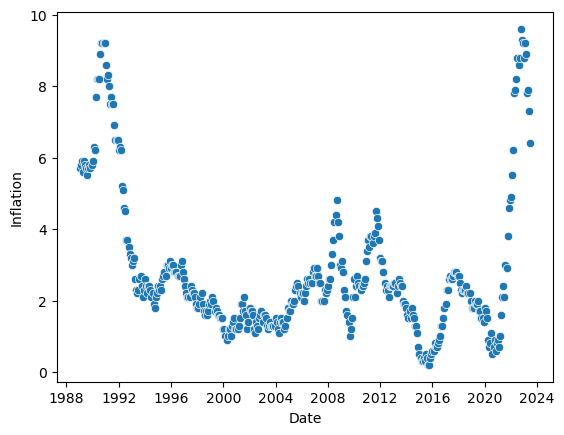

In [8]:
# To check if it's a linear relationship
import seaborn as sns
sns.scatterplot(data=Inflation_Month, x="Date", y="Inflation")

In [9]:
#Separating x and y -- Define features and target
x=Inflation_Month[["Year","Month"]]
y=Inflation_Month["Inflation"]

### Visualise the Time Series

#### Step 2: Visualising UK Inflation (1989–2023)

Before modelling, it’s important to explore the data visually.  
We’ll plot the inflation rate to observe long-term trends and potential volatility.

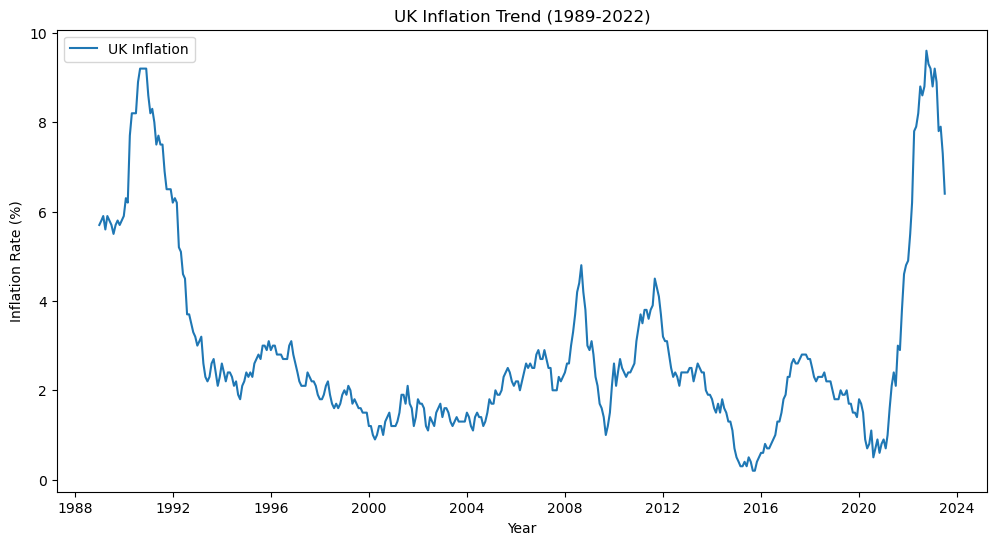

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(Inflation_Month.index, Inflation_Month["Inflation"], label="UK Inflation")
plt.title("UK Inflation Trend (1989-2022)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.show()

### Decompose to Show Trend & Seasonality

#### Step 3: Decomposing Trend and Seasonality

To understand the structure of inflation over time, we decompose it into:
- **Trend:** the long-term movement  
- **Seasonality:** recurring short-term patterns  
- **Residuals:** irregular fluctuations or noise

This helps identify any recurring seasonal patterns or long-term trend.

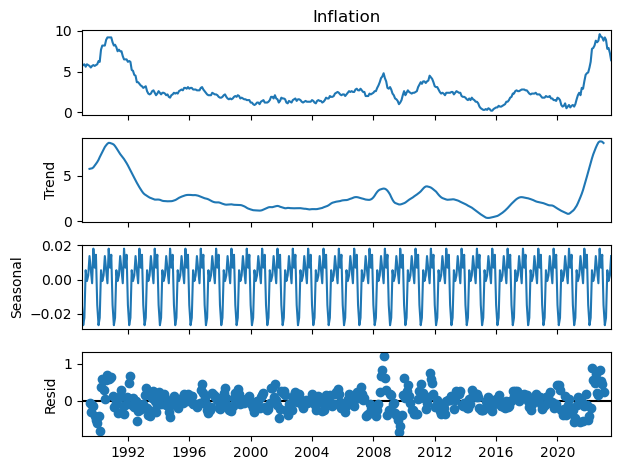

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(Inflation_Month["Inflation"], model="additive", period=12)
result.plot()
plt.show()

### Build and Fit an Arima Model

#### Step 4: ARIMA Model for Forecasting Inflation

We’ll build an **ARIMA (AutoRegressive Integrated Moving Average)** model to forecast future inflation.  
This model captures:
- **AR (p):** influence of past values  
- **I (d):** degree of differencing (trend removal)  
- **MA (q):** influence of past forecast errors


In [12]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(Inflation_Month["Inflation"], order=(1,1,1))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  415
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -47.028
Date:                Sat, 25 Oct 2025   AIC                            100.056
Time:                        10:24:21   BIC                            112.134
Sample:                    01-01-1989   HQIC                           104.832
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8602      0.044     19.364      0.000       0.773       0.947
ma.L1         -0.6896      0.065    -10.571      0.000      -0.817      -0.562
sigma2         0.0734      0.003     22.401      0.0

### Forecast Next 12 Months

#### Step 5: 12-Month Inflation Forecast

Using the fitted ARIMA model, we forecast UK inflation for the next 12 months.  
We’ll also include confidence intervals to show the expected uncertainty around the forecast.


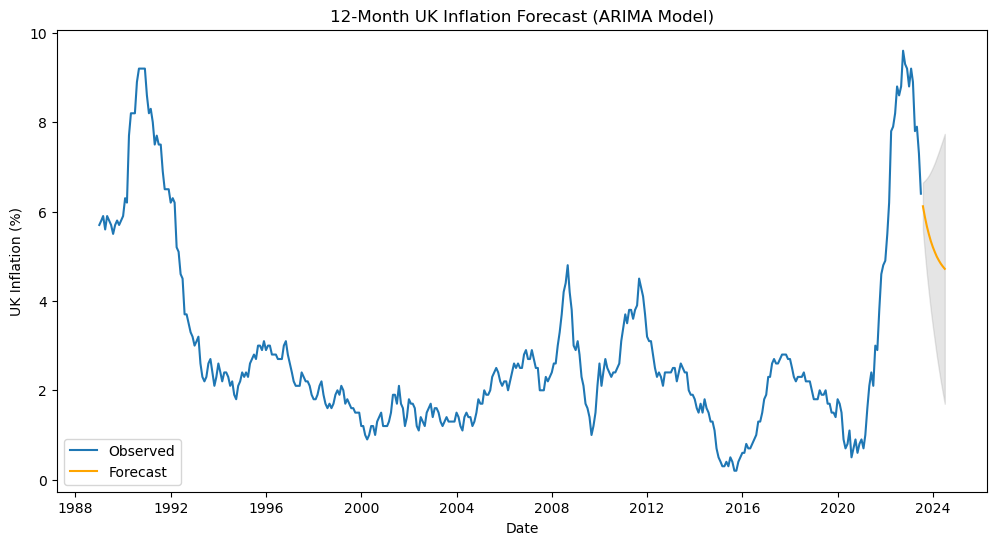

In [13]:
forecast = results.get_forecast(steps=12)
forecast_ci= forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(Inflation_Month.index, Inflation_Month["Inflation"], label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label= "Forecast", color="orange")
plt.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color="gray", alpha=0.2)
plt.title("12-Month UK Inflation Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("UK Inflation (%)")
plt.legend()
plt.show()

The chart above visualises both the **observed historical inflation rates** (blue line) and the **forecasted values** (orange line), with the **grey shaded region** representing the 95% confidence interval.

The model projects that inflation will **gradually decline and stabilise** over the next year, following the sharp rise observed during the 2021–2022 post-pandemic period.  
This indicates a **moderate cooling trend**, suggesting that inflationary pressures may ease as supply chain conditions normalise and monetary tightening takes effect.

While the forecast reflects a downward trend, the wide confidence interval highlights ongoing uncertainty driven by external factors such as energy prices, global conflicts, and monetary policy changes.

**Interpretation:**
- The predicted inflation rate is expected to settle around **3–4%** by the end of the forecast horizon.
- This aligns with the Bank of England’s long-term target of 2%, implying gradual reversion toward stability.
- Future model improvements could integrate variables like GDP growth, interest rates, and energy prices to refine predictive accuracy.


### Evaluate Model Accuracy

#### Step 6: Model Evaluation

To assess how well the ARIMA model performs, we split the dataset into:
- **Training set:** up to 2021  
- **Test set:** 2022  
We’ll compare predicted values with actual data using **Mean Squared Error (MSE)**.

In [17]:
train = Inflation_Month.loc[:"2021"]
test = Inflation_Month.loc["2022":]

model = ARIMA(train["Inflation"], order=(1,1,1))
results= model.fit()

forecast = results.forecast(steps=len(test))

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(test["Inflation"], forecast).round(2)
mae= mean_absolute_error(test["Inflation"], forecast).round(2)
rmse = (mse ** 0.5) . round (2)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

Test MSE: 6.36
Test MAE: 2.26
Test RMSE: 2.52


#### Step 7: Interpretation and Insights

##### 🔹 Long-Term Trend
The long-term trend shows how UK inflation evolved from 1989 to 2022, highlighting key periods such as:
- Early 1990s high inflation and subsequent stabilisation
- Low inflation from 2010–2020
- The post-2021 cost-of-living surge

##### 🔹 Seasonality
The decomposition indicates recurring inflation patterns that may align with seasonal energy or food price changes.

##### 🔹 Short-Term Forecast
The ARIMA model’s 12-month forecast suggests whether inflation is likely to **rise, stabilise, or decline** in the near future, based on past data.

##### 🔹 Economic Implications
Understanding these patterns helps:
- The **Bank of England** in setting monetary policy
- **Businesses** in pricing and wage planning
- **Households** in budgeting and financial decisions


#### Summary:
By analysing the UK CPIH dataset and applying the ARIMA forecasting model, this project provides a data-driven perspective on inflation trends. The insights gained can support informed decision-making by policymakers, economists, and businesses — particularly in understanding inflationary pressures and anticipating future changes in the cost of living.

#### Data Source:

**Dataset Name:** UK CPIH (Consumer Prices Index including owner occupiers’ housing costs)

**Time Range:** 1989 – 2022

**Source:** [Kaggle – UK Inflation Dataset (1989–2023)](https://www.kaggle.com)

**Licence:** Open Government Licence v3.0 (OGL 3.0)

**Data Description:** The CPIH index is a measure of inflation that includes owner occupiers’ 
housing costs (OOH), such as rent and mortgage interest payments. 
This index gives a more complete picture of price changes faced by UK households than the standard CPI.

**Publisher:** Office for National Statistics (ONS), made available via Kaggle.